## Code Along :: Feature Selection and Logistic regression

## About the Dataset

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter. 

-  Number of Instances: 4601 (1813 Spam = 39.4%)
-  Number of Attributes: 58 (57 continuous, 1 nominal class label)

 -  Attribute Information:

    -  The last column of 'spambase.data' denotes whether the e-mail was 
       considered spam (1) or not (0)
    
    - 48 attributes are continuous real [0,100] numbers of type `word freq WORD` i.e. percentage of words in the e-mail that         match WORD

    - 6 attributes are continuous real [0,100] numbers of type `char freq CHAR` i.e. percentage of characters in the e-mail           that match CHAR
    
    - 1 attribute is continuous real [1,...] numbers of type `capital run length average` i.e. average length of uninterrupted       sequences of capital letters

    - 1 attribute is continuous integer [1,...] numbers of type `capital run length longest` i.e. length of longest                   uninterrupted sequence of capital letters

    - 1 attribute is continuous integer [1,...] numbers of type `capital run length total` i.e. sum of length of uninterrupted       sequences of capital letters in the email

    - 1 attribute is nominal {0,1} class  of type spam i.e  denotes whether the e-mail was considered spam (1) or not (0),  

- Missing Attribute Values: None

- Class Distribution:
	Spam	  1813  (39.4%)
	Non-Spam  2788  (60.6%)



You can read more about dataset [here](https://archive.ics.uci.edu/ml/datasets/spambase)


In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
#Loading the Spam data for the mini challenge
#Target variable is the 57 column i.e spam, non-spam classes 
df = pd.read_csv('spambase.data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 1. Get an overview of your data by using info() and describe() functions of pandas.


In [3]:
# Overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
0     4601 non-null float64
1     4601 non-null float64
2     4601 non-null float64
3     4601 non-null float64
4     4601 non-null float64
5     4601 non-null float64
6     4601 non-null float64
7     4601 non-null float64
8     4601 non-null float64
9     4601 non-null float64
10    4601 non-null float64
11    4601 non-null float64
12    4601 non-null float64
13    4601 non-null float64
14    4601 non-null float64
15    4601 non-null float64
16    4601 non-null float64
17    4601 non-null float64
18    4601 non-null float64
19    4601 non-null float64
20    4601 non-null float64
21    4601 non-null float64
22    4601 non-null float64
23    4601 non-null float64
24    4601 non-null float64
25    4601 non-null float64
26    4601 non-null float64
27    4601 non-null float64
28    4601 non-null float64
29    4601 non-null float64
30    4601 non-null float64
31    4601 non-null float

In [103]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### 2. Split the data into train and test set and fit the base logistic regression model on train set.

In [104]:
#Dividing the dataset set in train and test set and apply base logistic model
X = df.drop(columns= 57, axis=1)
#X.head()

Y = df[57]
#Y.head()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

### 3. Find out the accuracy , print out the Classification report and Confusion Matrix.

In [105]:
# Calculate accuracy , print out the Classification report and Confusion Matrix.
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.9319333816075308


In [106]:
logreg.score(X_test, y_test)

0.9319333816075308

In [107]:
print("Classification Report is\n {}". format(classification_report(y_test, y_pred)))

Classification Report is
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       804
           1       0.94      0.90      0.92       577

   micro avg       0.93      0.93      0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381



In [108]:
print("Confusion Matrix is {}".format(confusion_matrix(y_test, y_pred)))

Confusion Matrix is [[770  34]
 [ 60 517]]


### 4. Copy dataset df into df1 variable and apply correlation on df1

In [109]:
# Copy df in new variable df1
df1 = df.copy(deep=True)

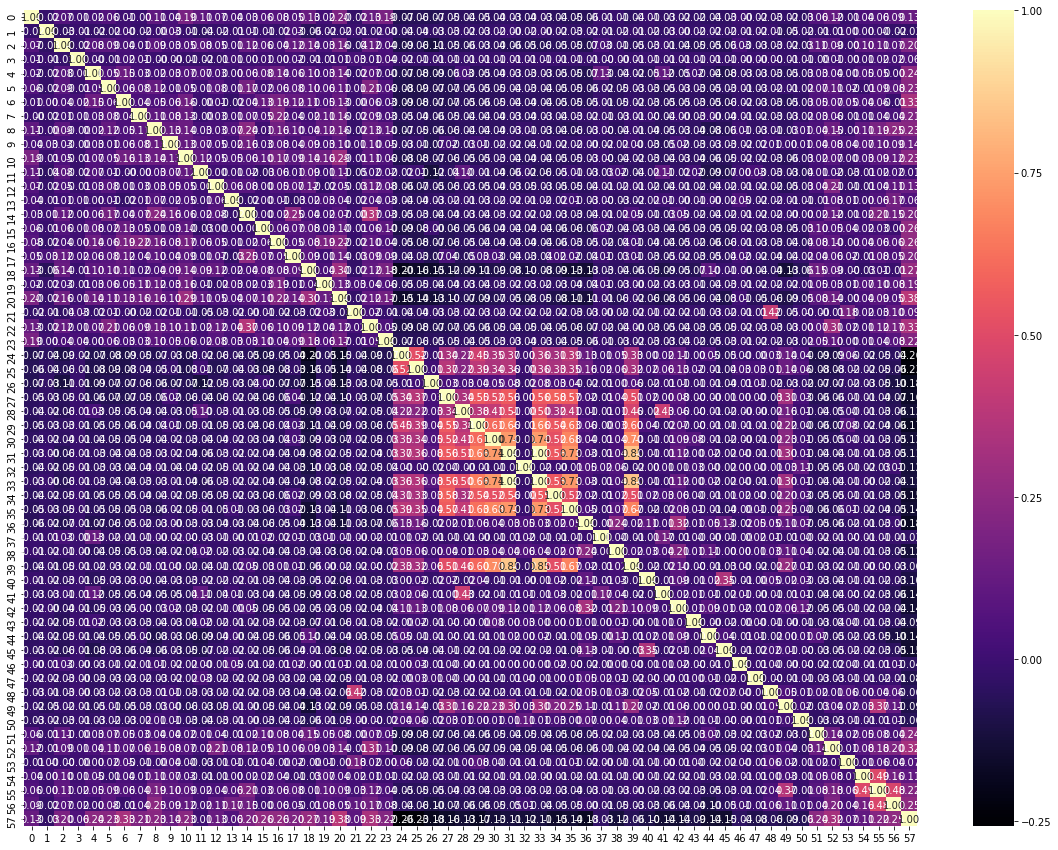

In [110]:
plt.figure(figsize = (20, 15))
sns.heatmap(df1.corr(), annot=True, fmt = '.2f', cmap='magma' )

### 5. As we have learned  one of the assumptions of Logistic Regression model is that the independent features should not be correlated to each other(i.e Multicollinearity), So we have to find the features that have a correlation higher that 0.75 and remove the same so that the assumption for logistic regression model is satisfied. 

In [111]:
# Remove Correlated features above 0.75 and then apply logistic model
corr = df1.corr()

#sns.heatmap(data = corr,annot=True, fmt='.2f', cmap='magma' )

highly_correlated_features = set()
for col in corr:
    for index in corr.index :
        if (corr[index][col] > 0.75 or corr[index][col] < -0.75) :
            if index != col :
                print(index, col)
                highly_correlated_features.add(index)
print(highly_correlated_features)

33 31
39 31
31 33
39 33
31 39
33 39
{33, 31, 39}


In [112]:
upper = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(np.bool))

cols = [cols for cols in corr if any(upper[cols] > 0.75)]

cols

[33, 39]

In [113]:
corr.unstack(level= -1).reset_index(1).sort_values(by = 0)[0 > .075]

57   -0.256723
24   -0.256723
57   -0.232968
25   -0.232968
18   -0.197683
24   -0.197683
57   -0.183404
26   -0.183404
57   -0.178045
36   -0.178045
29   -0.171095
57   -0.171095
18   -0.162800
25   -0.162800
57   -0.158800
27   -0.158800
18   -0.154758
26   -0.154758
20   -0.154633
24   -0.154633
34   -0.149225
57   -0.149225
57   -0.146138
45   -0.146138
57   -0.140408
44   -0.140408
41   -0.136615
57   -0.136615
35   -0.136134
57   -0.136134
        ...   
56    1.000000
27    1.000000
29    1.000000
54    1.000000
53    1.000000
52    1.000000
51    1.000000
50    1.000000
49    1.000000
48    1.000000
47    1.000000
46    1.000000
45    1.000000
44    1.000000
43    1.000000
42    1.000000
41    1.000000
40    1.000000
39    1.000000
38    1.000000
37    1.000000
36    1.000000
35    1.000000
34    1.000000
33    1.000000
32    1.000000
31    1.000000
30    1.000000
28    1.000000
57    1.000000
Name: 0, Length: 3364, dtype: float64

In [114]:
df1.drop(columns= [33, 39], axis=1, inplace=True)

### 6. Split the  new subset of the  data acquired by feature selection into train and test set and fit the logistic regression model on train set.

In [123]:
# Split the new subset of data and fit the logistic model on training data
#Dividing the dataset set in train and test set and apply base logistic model
X = df1.drop(columns= 57, axis=1)
#X.head()

Y = df1[57]  #df1[:, -1]
#Y.head()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

### 7. Find out the accuracy , print out the Classification report and Confusion Matrix.

In [124]:
# Calculate accuracy , print out the Classification report and Confusion Matrix.
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.9304851556842868


In [125]:
print("Classification Report is {}". format(classification_report(y_test, y_pred)))

Classification Report is               precision    recall  f1-score   support

           0       0.93      0.96      0.94       804
           1       0.93      0.90      0.92       577

   micro avg       0.93      0.93      0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381



In [126]:
print("Confusion Matrix is {}".format(confusion_matrix(y_test, y_pred)))

Confusion Matrix is [[768  36]
 [ 60 517]]


### 8. After keeping highly correlated features, there is not much change in the score. Lets apply another feature selection technique(Chi Squared test) to see whether we can increase our score. Find the optimum number of features using Chi Square and fit the logistic model on train data.

In [136]:
# Apply Chi Square and fit the logistic model on train data use df dataset
for top in [20, 25, 30, 35, 40, 45, 50, 55] :
    kbest = SelectKBest(chi2, k = top)
    X_train_new = kbest.fit_transform(X_train, y_train)
    X_test_new = kbest.transform(X_test)

    logreg2 = LogisticRegression(random_state=101)

    logreg2.fit(X_train_new, y_train)

    y_pred = logreg2.predict(X_test_new)

    # Calculate accuracy , print out the Classification report and Confusion Matrix.
    print("For k = {}, Accuracy is {}".format(top, accuracy_score(y_test, y_pred)))

    print("For k = {}, Classification Report is \n {}". format(top, classification_report(y_test, y_pred)))

    print("For k = {}, Confusion Matrix is {}".format(top, confusion_matrix(y_test, y_pred)))
    print('=='*50)

For k = 20, Accuracy is 0.9036929761042722
For k = 20, Classification Report is 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       804
           1       0.92      0.84      0.88       577

   micro avg       0.90      0.90      0.90      1381
   macro avg       0.91      0.89      0.90      1381
weighted avg       0.90      0.90      0.90      1381

For k = 20, Confusion Matrix is [[764  40]
 [ 93 484]]
For k = 25, Accuracy is 0.9152787834902245
For k = 25, Classification Report is 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       804
           1       0.92      0.87      0.90       577

   micro avg       0.92      0.92      0.92      1381
   macro avg       0.92      0.91      0.91      1381
weighted avg       0.92      0.92      0.91      1381

For k = 25, Confusion Matrix is [[762  42]
 [ 75 502]]
For k = 30, Accuracy is 0.9131064446053584
For k = 30, Classification Re

### 9. Find out the accuracy , print out the Confusion Matrix.

In [138]:
# Calculate accuracy , print out the Confusion Matrix 
print("For k = {}, Accuracy is {}".format(top, accuracy_score(y_test, y_pred)))
print("For k = {}, Classification Report is \n {}". format(top, classification_report(y_test, y_pred)))
print("For k = {}, Confusion Matrix is {}".format(top, confusion_matrix(y_test, y_pred)))
print('=='*50)

For k = 55, Accuracy is 0.9304851556842868
For k = 55, Classification Report is 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       804
           1       0.93      0.90      0.92       577

   micro avg       0.93      0.93      0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381

For k = 55, Confusion Matrix is [[768  36]
 [ 60 517]]


### 10. Using chi squared test there is no change in the score and the optimum features that we got is 55. Now lets see if we can increase our score using another feature selection technique called Anova.Find the optimum number of features using Anova and fit the logistic model on train data.

In [142]:
# Apply Anova and fit the logistic model on train data use df dataset
# Apply Chi Square and fit the logistic model on train data use df dataset
for top in [20, 25, 30, 35, 40, 45, 50, 55] :
    anova = SelectKBest(score_func=f_classif, k = top)
    X_train_new = anova.fit_transform(X_train, y_train)
    X_test_new = anova.transform(X_test)

    logreg2 = LogisticRegression(random_state=101)

    logreg2.fit(X_train_new, y_train)

    y_pred = logreg2.predict(X_test_new)

    # Calculate accuracy , print out the Classification report and Confusion Matrix.
    print("For k = {}, Accuracy is {}".format(top, accuracy_score(y_test, y_pred)))

    print("For k = {}, Classification Report is \n {}". format(top, classification_report(y_test, y_pred)))

    print("For k = {}, Confusion Matrix is {}".format(top, confusion_matrix(y_test, y_pred)))
    print('=='*50)


For k = 20, Accuracy is 0.889210716871832
For k = 20, Classification Report is 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       804
           1       0.91      0.81      0.86       577

   micro avg       0.89      0.89      0.89      1381
   macro avg       0.89      0.88      0.88      1381
weighted avg       0.89      0.89      0.89      1381

For k = 20, Confusion Matrix is [[759  45]
 [108 469]]
For k = 25, Accuracy is 0.9029688631426502
For k = 25, Classification Report is 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       804
           1       0.92      0.84      0.88       577

   micro avg       0.90      0.90      0.90      1381
   macro avg       0.91      0.89      0.90      1381
weighted avg       0.90      0.90      0.90      1381

For k = 25, Confusion Matrix is [[763  41]
 [ 93 484]]
For k = 30, Accuracy is 0.9145546705286025
For k = 30, Classification Rep

### 11. Find out the accuracy , print out the Confusion Matrix.

In [144]:
# Calculate accuracy , print out the Confusion Matrix 
print("For k = {}, Accuracy is {}".format(top, accuracy_score(y_test, y_pred)))

print("For k = {}, Classification Report is \n {}". format(top, classification_report(y_test, y_pred)))

print("For k = {}, Confusion Matrix is \n{}".format(top, confusion_matrix(y_test, y_pred)))
print('=='*50)


For k = 55, Accuracy is 0.9304851556842868
For k = 55, Classification Report is 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       804
           1       0.93      0.90      0.92       577

   micro avg       0.93      0.93      0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381

For k = 55, Confusion Matrix is 
[[768  36]
 [ 60 517]]


### 12. Unfortunately Anova also couldn't give us a better score . Let's finally attempt PCA on train data and find if it helps in  giving a better model by reducing the features.

In [147]:
# Apply Anova and fit the logistic model on train data use df dataset
# Apply PCA and fit the logistic model on train data use df dataset
for top in [20, 25, 30, 35, 40, 45, 50, 55] :
    pca = PCA(n_components=top)
    pca.fit(X_train)
    X_train_new = pca.transform(X_train)
    X_test_new = pca.transform(X_test)

    logreg2 = LogisticRegression(random_state=101)

    logreg2.fit(X_train_new, y_train)

    y_pred = logreg2.predict(X_test_new)

    # Calculate accuracy , print out the Classification report and Confusion Matrix.
    print("For k = {}, Accuracy is {}".format(top, logreg2.score(X_test_new, y_test)))

    print("For k = {}, Classification Report is \n {}". format(top, classification_report(y_test, y_pred)))

    print("For k = {}, Confusion Matrix is {}".format(top, confusion_matrix(y_test, y_pred)))
    print('=='*50)


For k = 20, Accuracy is 0.9036929761042722
For k = 20, Classification Report is 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       804
           1       0.88      0.89      0.89       577

   micro avg       0.90      0.90      0.90      1381
   macro avg       0.90      0.90      0.90      1381
weighted avg       0.90      0.90      0.90      1381

For k = 20, Confusion Matrix is [[736  68]
 [ 65 512]]
For k = 25, Accuracy is 0.9102099927588704
For k = 25, Classification Report is 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       804
           1       0.91      0.88      0.89       577

   micro avg       0.91      0.91      0.91      1381
   macro avg       0.91      0.91      0.91      1381
weighted avg       0.91      0.91      0.91      1381

For k = 25, Confusion Matrix is [[751  53]
 [ 71 506]]
For k = 30, Accuracy is 0.9138305575669804
For k = 30, Classification Re

### 13. Find out the accuracy , print out the Confusion Matrix.   

In [15]:
# Calculate accuracy , print out the Confusion Matrix 
y_pred = 

### 14. You can also compare your predicted values and observed values by printing out values of logistic.predict(X_test[]) and  y_test[].values

In [16]:
# Compare observed value and Predicted value
